In [1]:
import numpy as np
import os
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import getFeature1 # feature processing function
import matplotlib.pyplot as plt

In [2]:
# path config
save_root = "./plot"
health_csv = './data/csv/test/test_pain.csv'
pain_csv = './data/csv/test/test_pain2.csv'

if not os.path.isdir(save_root):
    os.makedirs(save_root)
plot_path = save_root+ "/result.png"

In [3]:
# train model
health_feat = getFeature1.go(health_csv, 0, 1, 1)
pain_feat = getFeature1.go(pain_csv, 0, 1, 1)
svr = SVR(kernel='rbf', gamma='auto', C=1000)
y = ['1'] * len(health_feat) + ['-1'] * len(pain_feat)
y = np.array(y, dtype='int_')
x = np.vstack([health_feat,pain_feat])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=0)
model = svr.fit(x_train, y_train)

In [4]:
# data to predict and plot
x_health_train = x_train[np.where(y_train==1)]
x_pain_train = x_train[np.where(y_train==-1)]
x_health_test = x_test[np.where(y_train==1)]
x_pain_test = x_test[np.where(y_train==-1)]

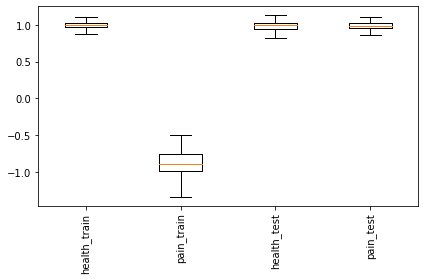

In [5]:
# predict and plot 
pred = []
pred.append(svr.predict(x_health_train))
pred.append(svr.predict(x_pain_train))
pred.append(svr.predict(x_health_test))
pred.append(svr.predict(x_pain_test))
labels = ['health_train','pain_train','health_test','pain_test']
plt.boxplot(pred, labels=labels, showfliers=False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(plot_path, facecolor='w')
#plt.clf()